202007C bloom timing

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
from pathlib import Path
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [2]:
def get_the_data(dir_path, year, numberdays):
    evenlessink = []
    for filename in sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))[:numberdays]:
        data = xr.load_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
  
    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [11]:
def get_the_data_numpy(dir_path, year):
    timeseries = {'diatoms': np.zeros(61),
                 'nitrate': np.zeros(61)}
    for it, filename in enumerate(sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))):
        data = xr.open_dataset(filename)
        timeseries['diatoms'][it] = data['diatoms'].isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )[0]
        timeseries['nitrate'][it] = data['nitrate'].isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )[0]
        data.close()

    return timeseries

In [ ]:
def get_the_data_nc(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}02*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = nc.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [3]:
def get_sockeye_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}02*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}03*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [4]:
def get_the_data_H201812(year):
    evenlessink = []
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}02*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [3]:
directory = '202007C'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
timeseries2015 = get_the_data(dir_path, '2015', 59)
timeseries2015

KeyboardInterrupt: 

In [19]:
%timeit
directory = '202007C'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
timeseries2015 = get_the_data_numpy(dir_path, '2015')
timeseries2015

{'diatoms': array([0.07781763, 0.06669509, 0.04359027, 0.04786264, 0.04813441,
        0.03052348, 0.02807882, 0.03674133, 0.05589352, 0.07999962,
        0.10942478, 0.14709464, 0.14453727, 0.14944214, 0.18548781,
        0.30978671, 0.46034306, 0.59357733, 0.72056395, 0.74646831,
        0.83499646, 1.033571  , 1.47086978, 2.00729203, 2.67289519,
        3.07269549, 2.81124783, 3.80700707, 4.76736736, 5.45999384,
        6.48953676, 7.19047928, 4.99521542, 3.21019936, 3.11117887,
        2.01524687, 1.53559959, 1.21580958, 1.11173475, 1.3259095 ,
        1.58460021, 1.84811115, 1.8164227 , 1.10911071, 1.48001707,
        1.83887005, 2.05362225, 1.67180252, 0.7654655 , 1.51094031,
        1.28854859, 1.47839129, 1.7678113 , 1.29187858, 2.36958694,
        3.80518866, 3.92819047, 3.8626976 , 3.97991848, 0.        ,
        0.        ]),
 'nitrate': array([19.29999542, 20.00234795, 21.76708984, 21.84047318, 22.0803566 ,
        23.35011482, 23.93930054, 23.98123169, 23.52876472, 22.5081

In [14]:
timeseries2015.compute()

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, nvertex: 4, time_counter: 59)
Coordinates:
    nav_lat                       float32 49.13
    nav_lon                       float32 -123.6
    deptht                        float32 1.5
    time_centered                 (time_counter) datetime64[ns] 2015-02-01T12...
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
Dimensions without coordinates: axis_nbounds, nvertex
Data variables:
    bounds_lon                    (time_counter, nvertex) float32 -123.6 ... ...
    bounds_lat                    (time_counter, nvertex) float32 49.12 ... 4...
    area                          (time_counter) float32 2.159e+05 ... 2.159e+05
    deptht_bounds                 (time_counter, axis_nbounds) float32 1.0 .....
    nitrate                       (time_counter) float32 19.3 20.0 ... 13.89
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] ...
    ammonium                      (time_counter) float32 0.9494 0.9065 ... 1.303
    silicon                       (time_counter) float32 46.97 46.81 ... 25.66
    diatoms                       (time_counter) float32 0.07782 0.0667 ... 3.98
    flagellates                   (time_counter) float32 0.4594 ... 0.1064
    ciliates                      (time_counter) float32 0.3708 ... 0.3594
    microzooplankton              (time_counter) float32 0.4098 ... 0.7822
    dissolved_organic_nitrogen    (time_counter) float32 0.5246 0.4486 ... 1.859
    particulate_organic_nitrogen  (time_counter) float32 0.02096 ... 0.3157
    biogenic_silicon              (time_counter) float32 0.002804 ... 0.4151
    mesozooplankton               (time_counter) float32 0.843 0.7635 ... 1.576
Attributes:
    name:         SalishSea_1d_20150201_20150205
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2020-Dec-18 14:45:54 GMT
    uuid:         8ad82a49-0e75-4554-b359-7906f5a458df

In [15]:
timeseries2015.to_netcdf('timeseries2015_fordoug.nc')

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/conventions.py:421: UserWarning: Variable 'time_counter' has datetime type and a bounds variable but time_counter.encoding does not have units specified. The units encodings for 'time_counter' and 'time_counter_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time_counter' before writing to a file.
  warnings.warn(


In [16]:
del timeseries2015

In [18]:
!conda list xarray

# packages in environment at /ocean/sallen/miniconda3/envs/py39:
#
# Name                    Version                   Build  Channel
xarray                    0.16.2             pyhd8ed1ab_0    conda-forge


In [17]:
%whos

Variable               Type        Data/Info
--------------------------------------------
directory              str         202007C
dt                     module      <module 'datetime' from '<...>b/python3.9/datetime.py'>
get_sockeye_data       function    <function get_sockeye_data at 0x7f70e76e7670>
get_the_data           function    <function get_the_data at 0x7f70e76e73a0>
get_the_data_H201812   function    <function get_the_data_H201812 at 0x7f70e76e7700>
glob                   module      <module 'glob' from '/oce<...>9/lib/python3.9/glob.py'>
np                     module      <module 'numpy' from '/oc<...>kages/numpy/__init__.py'>
pd                     module      <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
places                 module      <module 'salishsea_tools.<...>lishsea_tools/places.py'>
plt                    module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
xr                     module      <module 'xarray' from '/o<...>ages/xarray/_

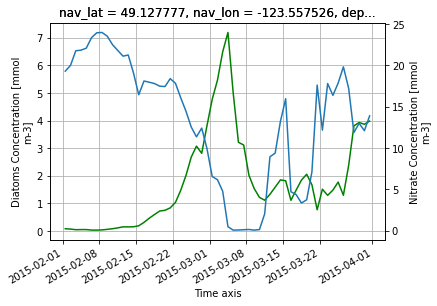

In [6]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2015.nitrate.plot(ax=ax2);
ax.grid()

In [8]:
print(timeseries2015.diatoms[28:38])
print(timeseries2015.time_counter[31])

<xarray.DataArray 'diatoms' (time_counter: 10)>
array([4.7673674, 5.459994 , 6.489537 , 7.1904793, 4.9952154, 3.2101994,
       3.1111789, 2.0152469, 1.5355996, 1.2158096], dtype=float32)
Coordinates:
    nav_lat        float32 49.13
    nav_lon        float32 -123.6
    deptht         float32 1.5
    time_centered  (time_counter) datetime64[ns] 2015-03-01T12:00:00 ... 2015...
  * time_counter   (time_counter) datetime64[ns] 2015-03-01T12:00:00 ... 2015...
Attributes:
    standard_name:       mole_concentration_of_diatoms_expressed_as_nitrogen_...
    long_name:           Diatoms Concentration
    units:               mmol m-3
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area
<xarray.DataArray 'time_counter' ()>
array('2015-03-04T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    nav_lat        float32 49.13
    nav_lon        float32 -123.6
    

In [11]:
directory = 'nowcast-green.201812'
old2015 = get_the_data_H201812('2015')

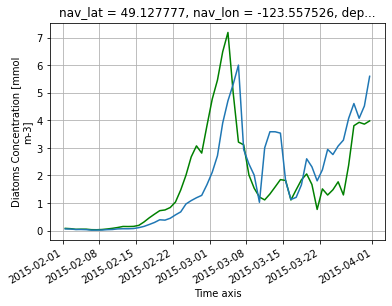

In [12]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()

In [13]:
df1 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df2 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df3 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

In [15]:
df4 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df5 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,5,7,9,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df6 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

In [18]:
df = pd.concat([df1.drop(df1[df1.TimeUTC<'2015'].index),
                df2.drop(df2[df2.TimeUTC>'2018'].index),
                df3.drop(df3[df3.TimeUTC>'2018'].index),
                df4.drop(df4[df4.TimeUTC>'2018'].index),
                df5.drop(df5[df5.TimeUTC>'2018'].index),
                df6.drop(df6[df6.TimeUTC>'2018'].index),
               ], ignore_index=True)

In [19]:
dts = [dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df = df.assign(dts=dts)
df['Lat'] = pd.to_numeric(df['Lat'],errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'],errors='coerce')

In [20]:
llon = places.PLACES['S3']['lon lat'][0] - .01
ulon = places.PLACES['S3']['lon lat'][0] + .01
llat = places.PLACES['S3']['lon lat'][1] - .01
ulat = places.PLACES['S3']['lon lat'][1] + .01
iidfnd = (df.Lon > llon) & (df.Lon < ulon) & (df.Lat > llat) & (df.Lat < ulat)

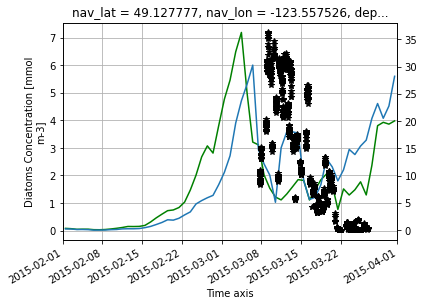

In [21]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
old2015.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2015, 2, 1),dt.datetime(2015, 4, 1)));

## 2016

In [19]:
directory = '202007C'
timeseries2016 = get_the_data('2016')

In [20]:
directory = 'ESS_2018_LF'
old2016 = get_sockeye_data('2016')

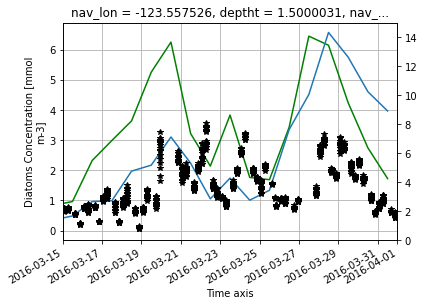

In [21]:
fig, ax = plt.subplots(1, 1)
timeseries2016.diatoms.plot(ax=ax, color='g')
old2016.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax2.set_ylim(0, 15)
ax.set_xlim((dt.datetime(2016, 3, 15),dt.datetime(2016, 4, 1)));

## 2017 not run yet

In [14]:
directory = 'ESS_2018_LF'
timeseries2017 = get_sockeye_data('2017')

In [15]:
directory = 'ESS_2018'
old2017 = get_the_data('2017')

In [ ]:
fig, ax = plt.subplots(1, 1)
timeseries2017.diatoms.plot(ax=ax, color='g')
old2017.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2017, 3, 1),dt.datetime(2017, 4, 30)));

In [4]:
doug = nc.Dataset('timeseries2015_fordoug.nc')
doug

TypeError: expected str, bytes or os.PathLike object, not tuple